In [1]:
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
import pingouin as pg
import numpy as np

In [2]:
df = pd.read_csv("Europe.csv")


In [3]:
print(df.head(5))

   Rank        Company      Industry  Revenue(US$ billions)    Headquarters
0     1     Volkswagen    Automotive                348.408         Germany
1     2          Shell   Oil and gas                323.183  United Kingdom
2     3  TotalEnergies   Oil and gas                218.945          France
3     4       Glencore  Conglomerate                217.829     Switzerland
4     5             BP   Oil and gas                213.032  United Kingdom


In [4]:
print(df.dtypes)

Rank                       int64
Company                   object
Industry                  object
Revenue(US$ billions)    float64
Headquarters              object
dtype: object


In [5]:
print(df.shape)

(100, 5)


In [6]:
print(df.isnull().sum())

Rank                     0
Company                  0
Industry                 0
Revenue(US$ billions)    0
Headquarters             0
dtype: int64


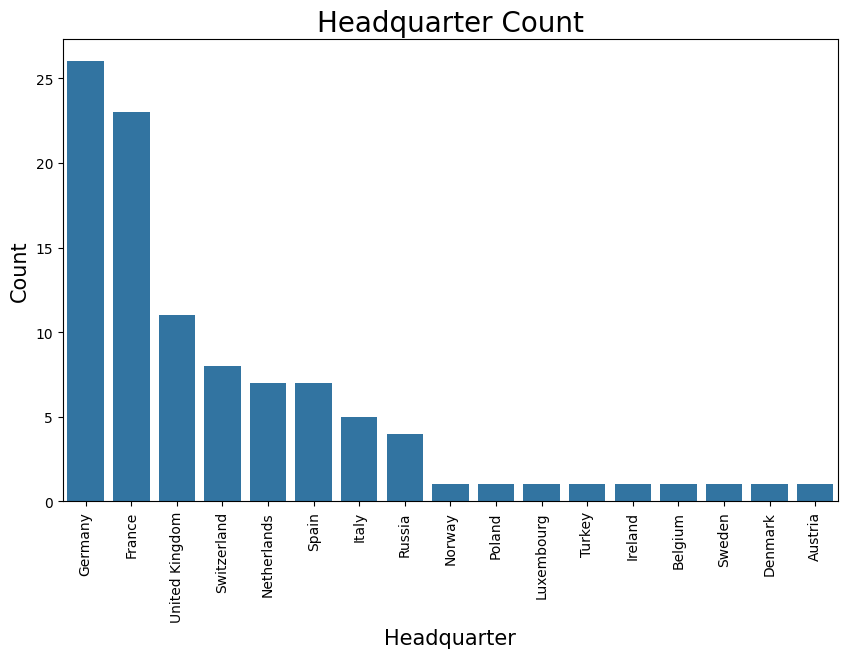

In [7]:
asc=df["Headquarters"].value_counts(normalize=True).index
plt.figure(figsize=(10,6))
sns.countplot(df,x="Headquarters",order=asc)
plt.xticks(rotation=90)
plt.title("Headquarter Count",size=20)
plt.ylabel("Count",size=15)
plt.xlabel("Headquarter", size=15)
plt.show()


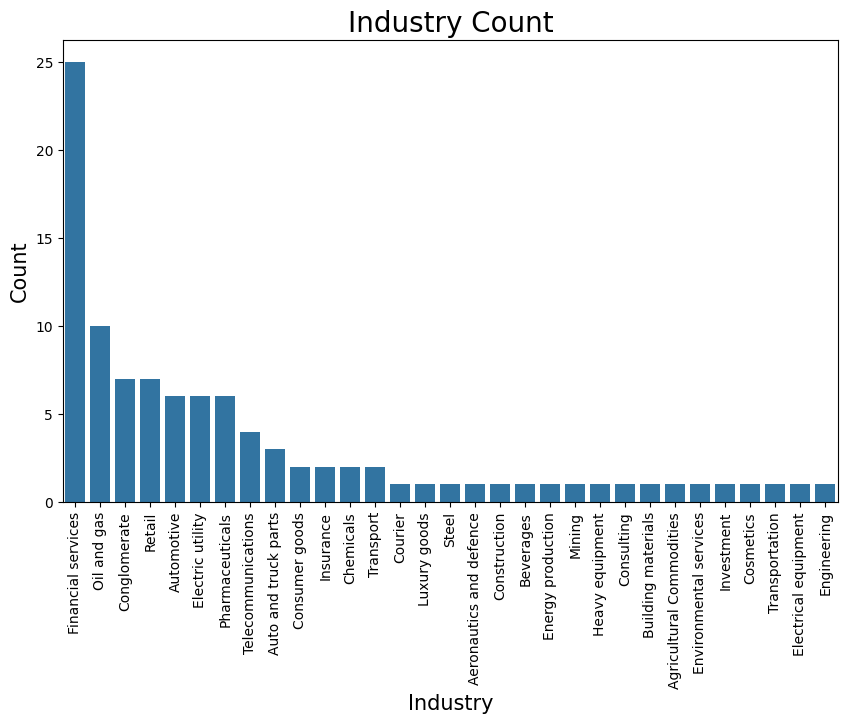

In [8]:
abd = df["Industry"].value_counts(normalize=True).index
plt.figure(figsize=(10,6))
sns.countplot(df, x="Industry",order=abd)
plt.xticks(rotation=90)
plt.title("Industry Count",size=20)
plt.ylabel("Count",size=15)
plt.xlabel("Industry",size=15)
plt.show()

In [9]:
flss= df[df["Industry"]=="Financial services"]["Headquarters"].value_counts()
print(flss.head(5))


Headquarters
France            7
Germany           5
United Kingdom    3
Switzerland       3
Italy             3
Name: count, dtype: int64


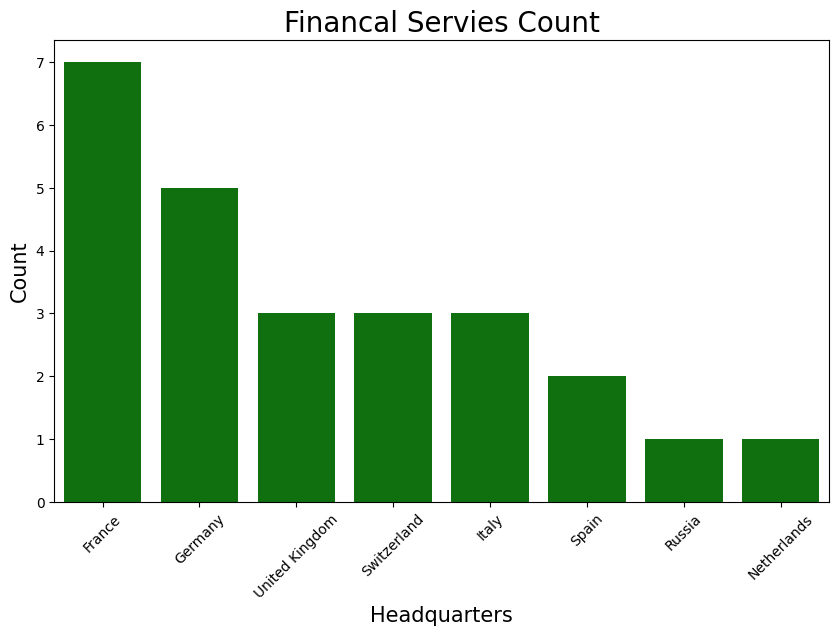

In [10]:
flss = df[df["Industry"]=="Financial services"]["Headquarters"].value_counts().reset_index()
flss.columns = ["Headquarters", "Count"]
plt.figure(figsize=(10,6))
sns.barplot(data=flss, x="Headquarters", y="Count",color="green")
plt.xticks(rotation=45)
plt.title("Financal Servies Count",size=20)
plt.ylabel("Count",size=15)
plt.xlabel("Headquarters",size=15)
plt.show()

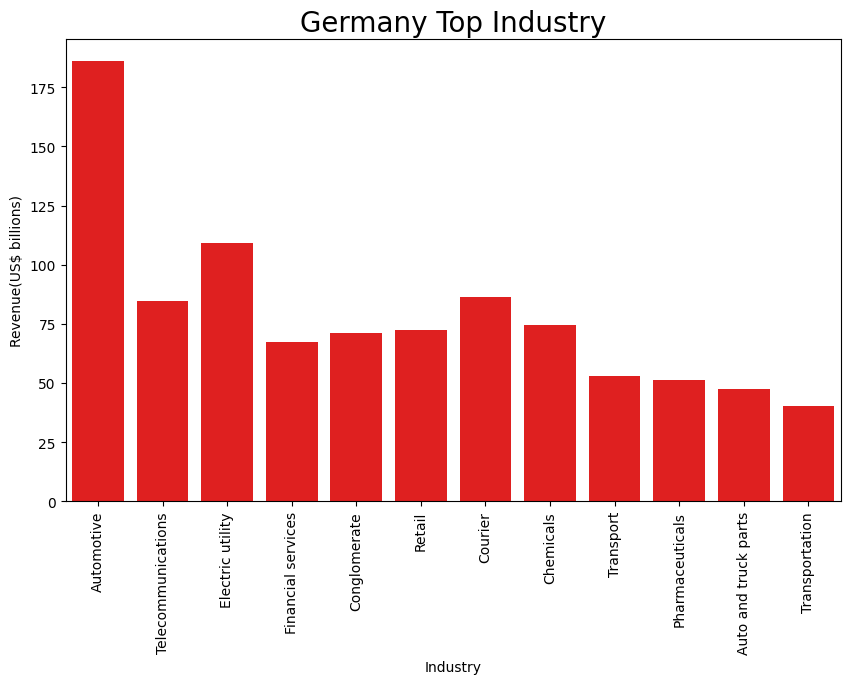

In [11]:
germantop= df[df["Headquarters"]=="Germany"]

plt.figure(figsize=(10,6))
sns.barplot(data=germantop,x="Industry",y="Revenue(US$ billions)",color="red",errorbar=None)
plt.xticks(rotation=90)
plt.title("Germany Top Industry",size=20)
plt.show()

Text(0.5, 1.0, 'German Industry: Revenue and Outliers by Sector')

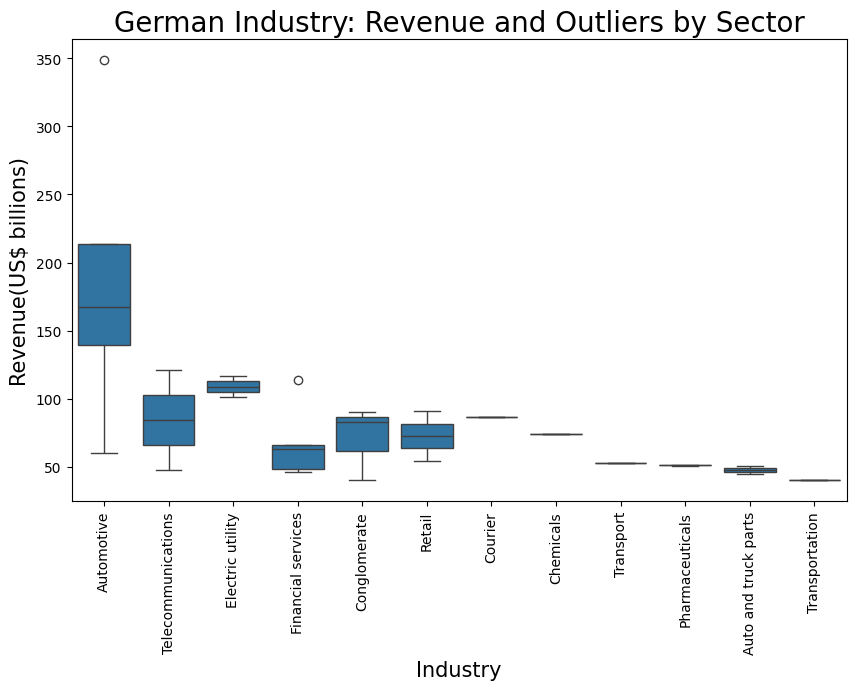

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=germantop,x="Industry",y="Revenue(US$ billions)")
plt.xticks(rotation=90)
plt.xlabel("Industry",size=15)
plt.ylabel("Revenue(US$ billions)",size=15)
plt.title("German Industry: Revenue and Outliers by Sector",size=20)


ANOVA TESTS

In [13]:
pg.anova(df,dv="Revenue(US$ billions)",between="Headquarters")


,Source,ddof1,ddof2,F,p-unc,np2
0,Headquarters,16,83,0.283343,0.99675,0.051792


In [14]:
pg.anova(df, dv="Revenue(US$ billions)" , between="Industry" )

,Source,ddof1,ddof2,F,p-unc,np2
0,Industry,30,69,1.371249,0.141061,0.37351


In [15]:
pg.anova(df, dv="Revenue(US$ billions)" , between="Company" )

,Source,ddof1,ddof2,F,p-unc,np2
0,Company,98,1,2.583768,0.464691,0.996066
